In [1]:
!pip install psycopg2-binary

In [2]:
import psycopg2

psqlConnection = psycopg2.connect(
    host = '/var/run/postgresql',
    database = 'imdb',
    user = 'HAHAHAH',
    password = 'HAHAHAH'
)


In [3]:
cursor = psqlConnection.cursor()

cursor.execute('''select * from imdb.public.xf_title_ratings''')

In [4]:
title_ratings = cursor.fetchall()

In [5]:
psqlConnection.commit()

In [6]:
import pandas as pd

title_ratings = pd.DataFrame(list(title_ratings), 
                             columns = ['tconst', 
                                        'avgrating', 
                                        'numvotes'
                                       ]
                            )
title_ratings

,tconst,avgrating,numvotes
0,tt0000001,5.7,1868
1,tt0000002,5.9,247
2,tt0000003,6.5,1640
3,tt0000004,5.8,159
4,tt0000005,6.2,2463
...,...,...,...
1226993,tt9916690,6.6,5
1226994,tt9916720,5.7,199
1226995,tt9916730,8.4,5
1226996,tt9916766,6.7,19


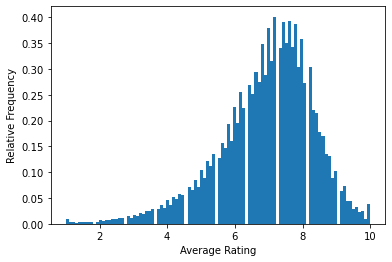

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

#This is a histogram with 100 bins, I tested with varying bin #s and this seemed to provide
#the best tradeoff between granularity and performance


x = title_ratings['avgrating']

plt.hist(x, density=True, bins = 100)  # density=False would make counts
plt.xlabel('Average Rating');
plt.ylabel('Relative Frequency');

In [8]:
from scipy.stats import shapiro

shapiro(title_ratings['avgrating'])

/home/peterjr/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9668972492218018, pvalue=0.0)